In [1]:
%matplotlib inline
import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt
import numpy

(854, 1288, 3)

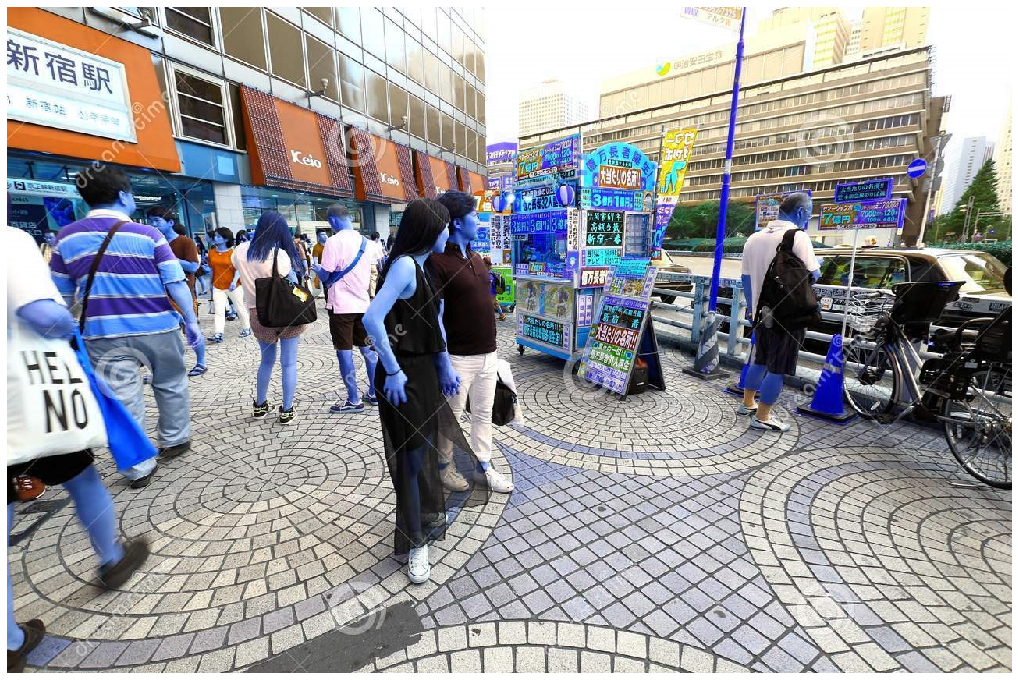

In [2]:
att_labels = ["is_male", "has_bag", "has_backpack", "has_hat", "has_longsleeves", 
              "has_longpants", "has_longhair", "has_coat_jacket"]
font = cv2.FONT_HERSHEY_SIMPLEX
plt.rcParams['figure.figsize'] = (18, 18)



campus = cv2.imread("street.jpg")
plt.axis("off")
plt.imshow(campus)
campus.shape

###### Run attribute

In [3]:
# Person Detection Model
person_detection = cv2.dnn.readNet("models/person-detection-retail-0013.bin",
                                   "models/person-detection-retail-0013.xml")

person_detection.setPreferableBackend(cv2.dnn.DNN_BACKEND_INFERENCE_ENGINE)
person_detection.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)



# Person Attribute Model
person_attribute = cv2.dnn.readNet("models/person-attributes-recognition-crossroad-0230.bin",
                                   "models/person-attributes-recognition-crossroad-0230.xml")

person_attribute.setPreferableBackend(cv2.dnn.DNN_BACKEND_INFERENCE_ENGINE)
person_attribute.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [4]:
PD_blob = cv2.dnn.blobFromImage(campus)
person_detection.setInput(PD_blob)
PD_out = person_detection.forward() 

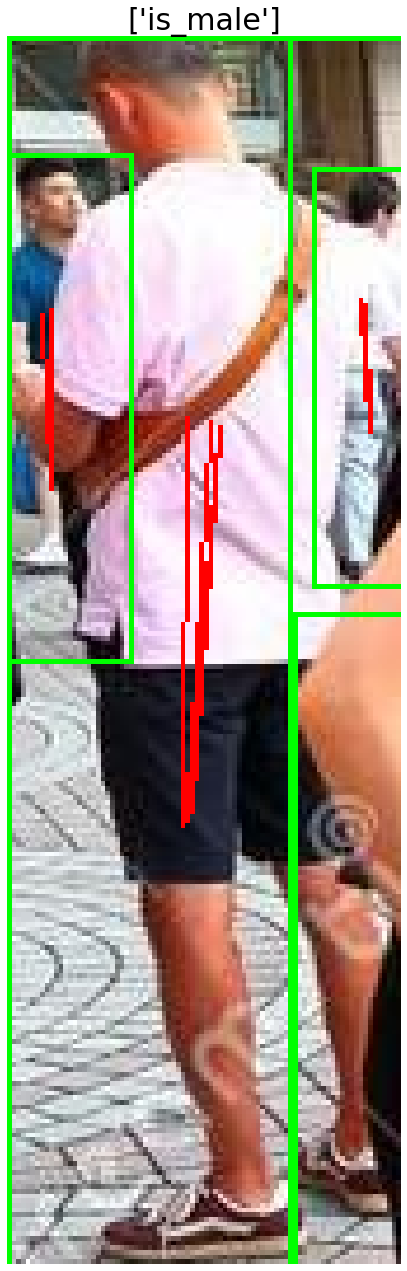

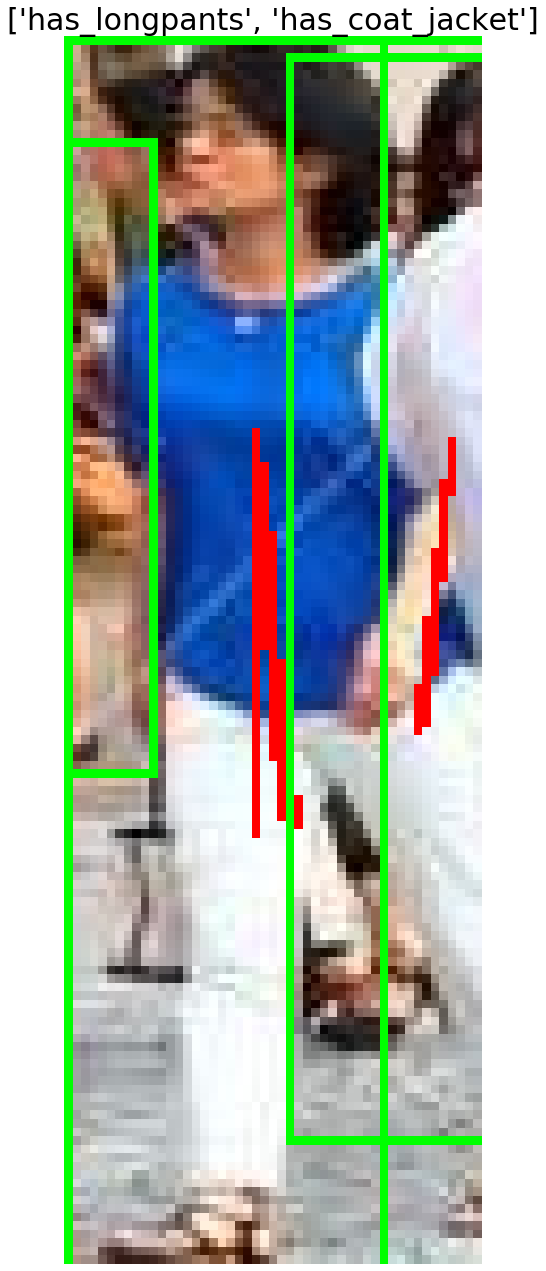

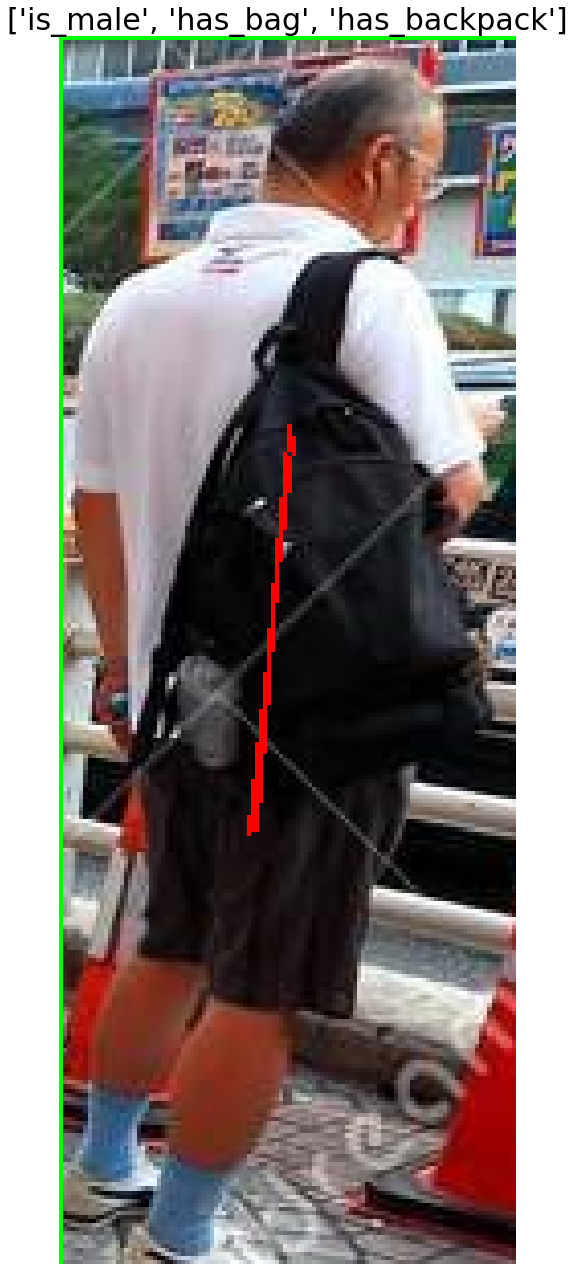

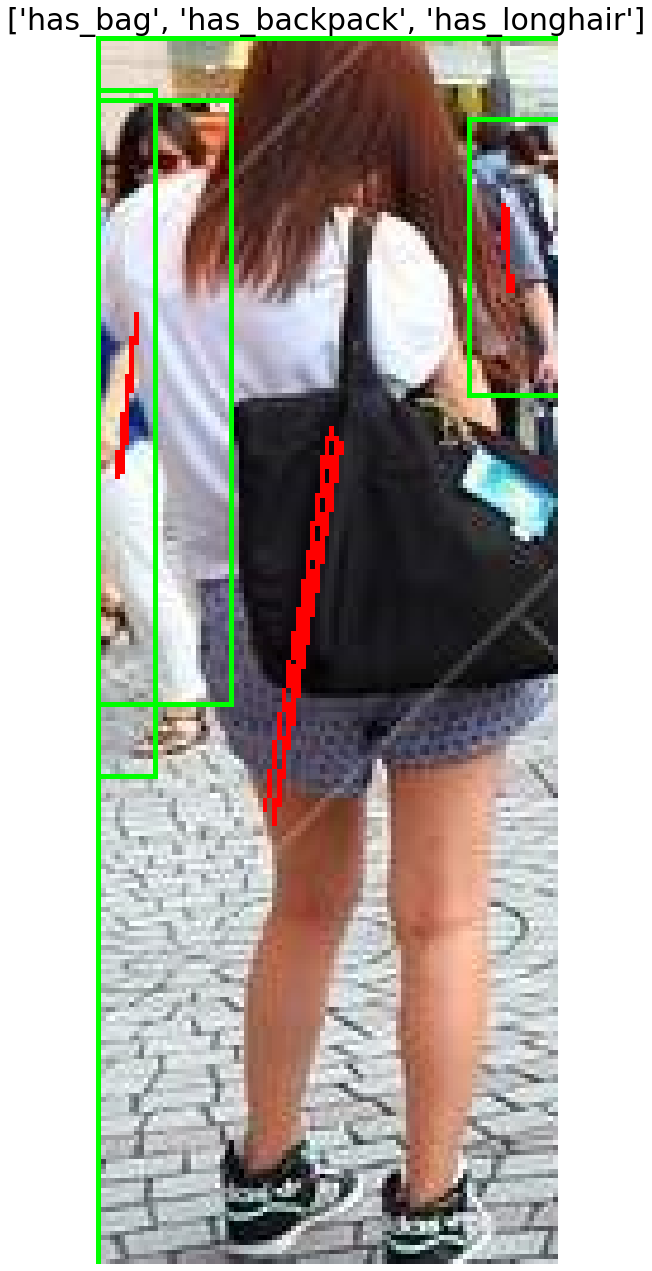

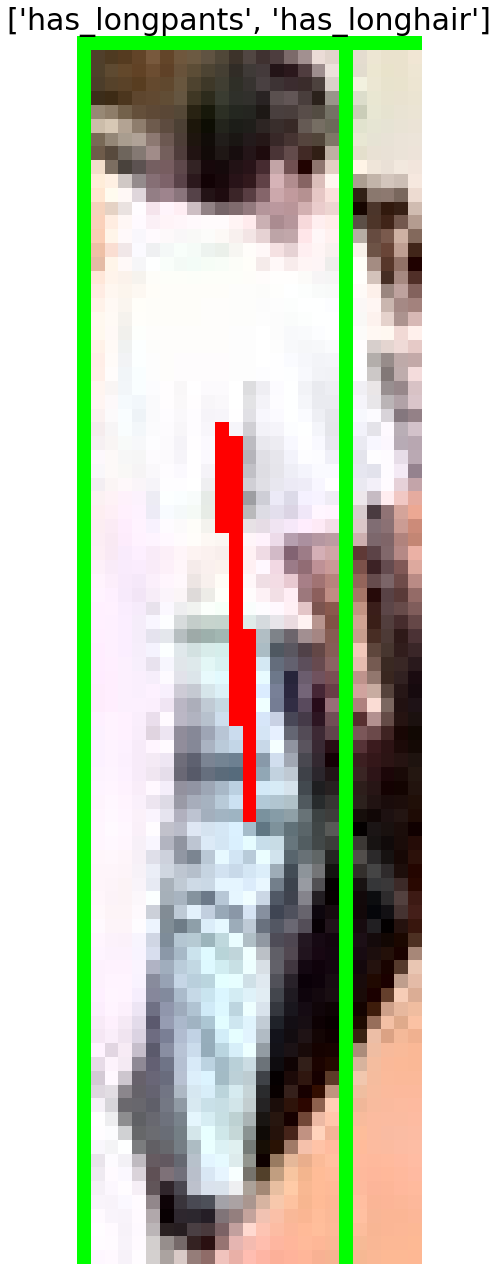

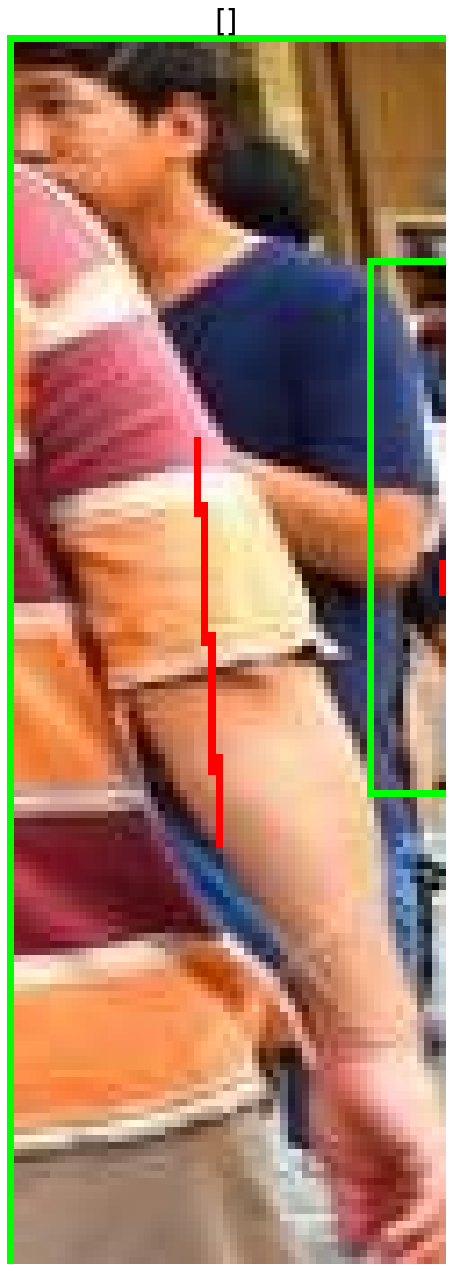

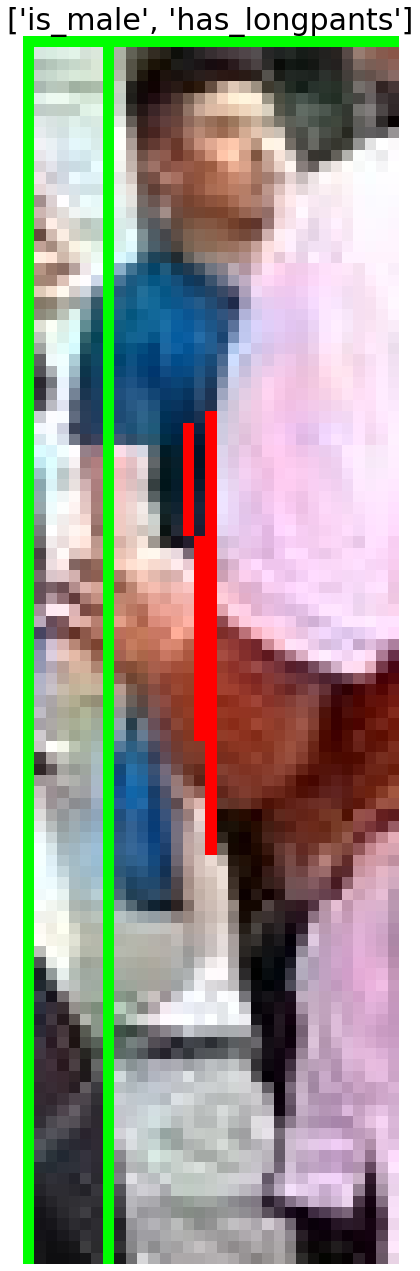

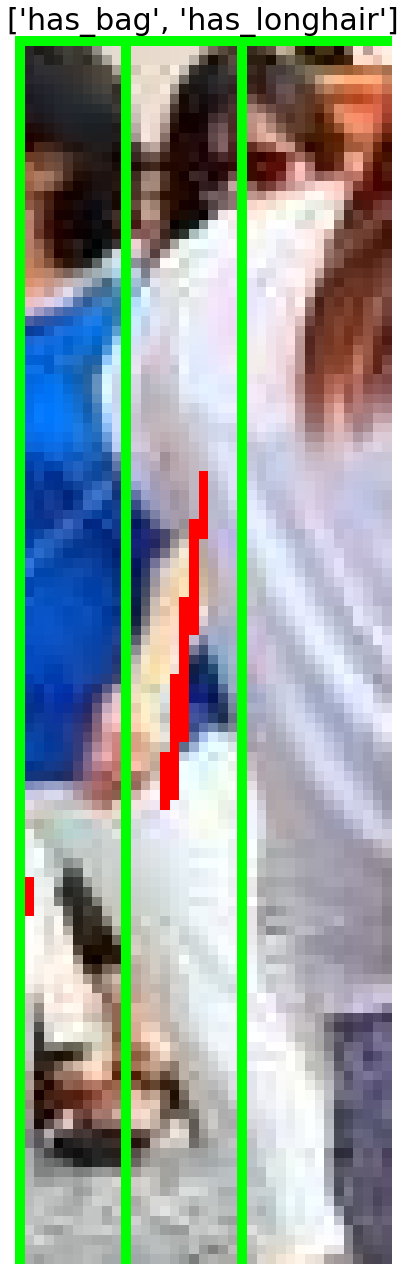

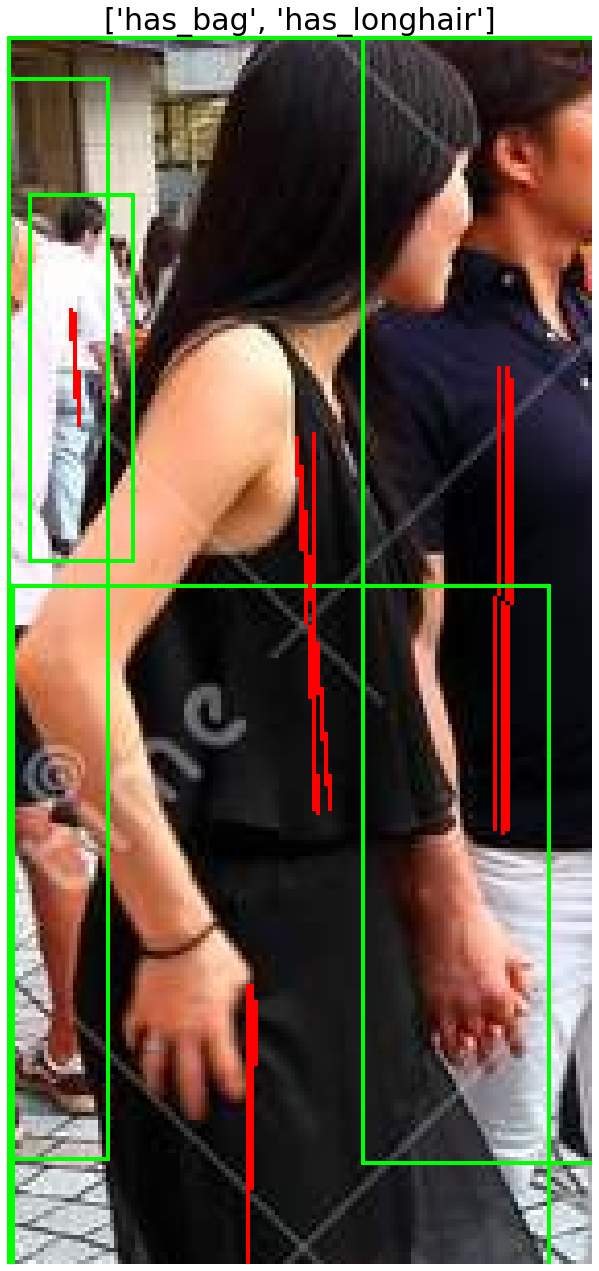

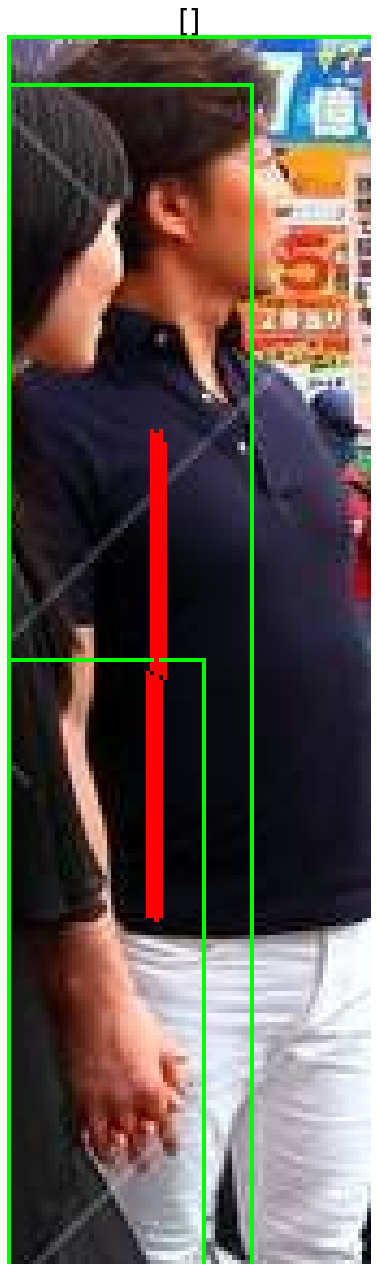

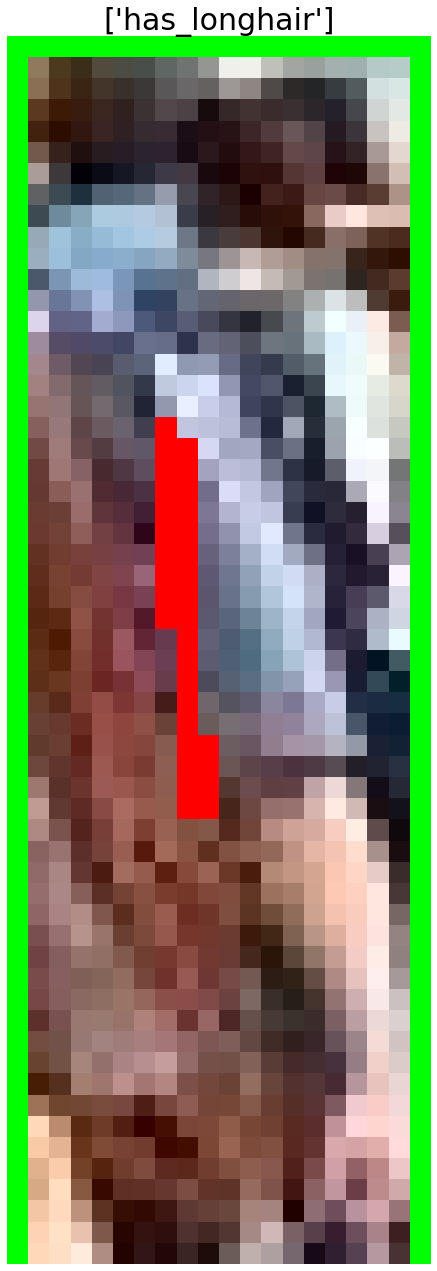

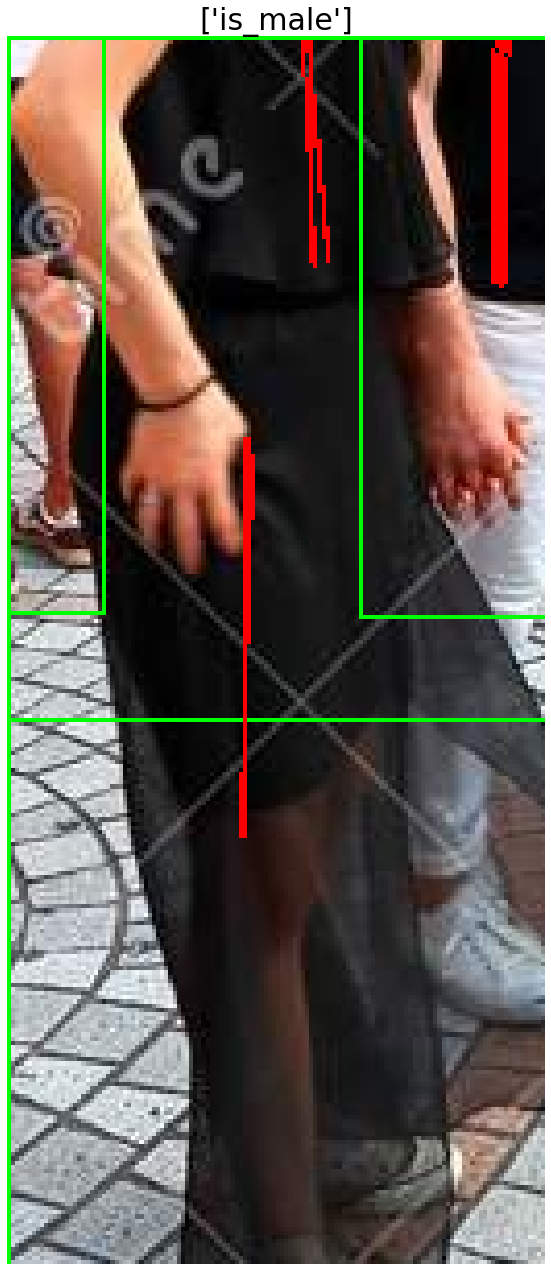

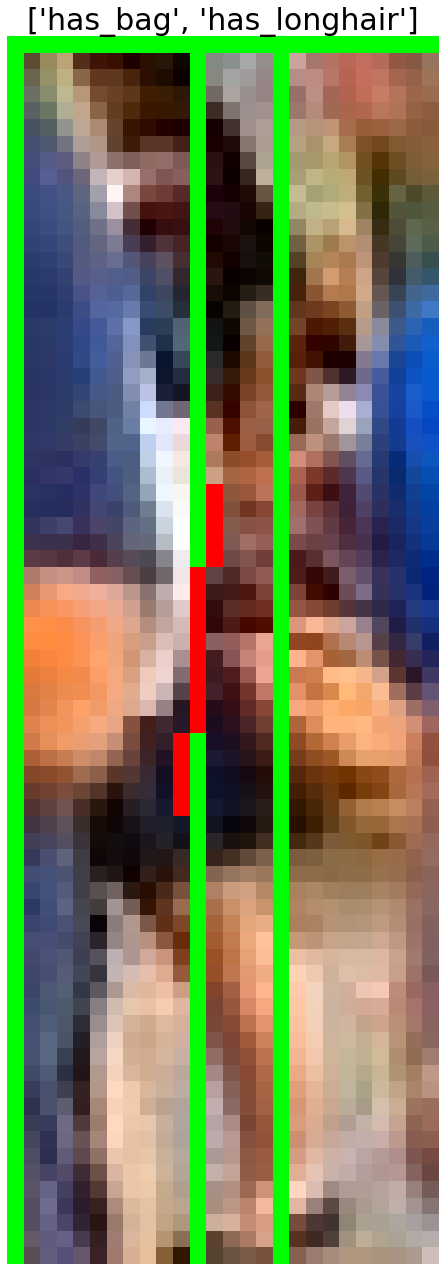

In [8]:
person_id = 0 

for detection in PD_out.reshape(-1, 7):
    confidence = float(detection[2])
    xmin = int(detection[3] * campus.shape[1])
    ymin = int(detection[4] * campus.shape[0])
    xmax = int(detection[5] * campus.shape[1])
    ymax = int(detection[6] * campus.shape[0])
    
    if confidence > 0.4:
        cv2.rectangle(campus, (xmin, ymin), (xmax, ymax), color=(0, 255, 0))
        person_crop = campus[ymin:ymax,xmin:xmax]
        
        PA_blob = cv2.dnn.blobFromImage(person_crop,size = (80,160))
        person_attribute.setInput(PA_blob)
        PA_out = person_attribute.forward(["453","456","459"]) 
        
        attributes = PA_out[0].reshape(-1)
        toppoint = PA_out[1].reshape(-1)
        botpoint = PA_out[2].reshape(-1)
        
        Xmin = int(toppoint[0]*person_crop.shape[1])
        Ymin = int(toppoint[1]*person_crop.shape[0])
        
        Xmax = int(botpoint[0]*person_crop.shape[1])
        Ymax = int(botpoint[1]*person_crop.shape[0])
        cv2.line(person_crop,(Xmin,Ymin),(Xmax,Ymax),(0,0,255),thickness = 1)
        
        PA_labels = []
        for label,prob in zip(att_labels,attributes):
            if prob > 0.4:
                PA_labels.append(label)
                
        
        person_crop_rgb = cv2.cvtColor(person_crop,cv2.COLOR_BGR2RGB)
        

        plt.title("{}".format(PA_labels),fontsize =30)
        plt.imshow(person_crop_rgb)
        plt.tight_layout()
        plt.axis("off")
        plt.savefig("{}.png".format(person_id))
        plt.show()
 
      
        person_id += 1
        